# I Pakartoniniai neuroniniai tinklai

## Temos

<code>**1  : Įvairūs darbo su tekstiniais duomenimis metodai**</code><br>
<code>**2  : Sekos modeliavimas su RNN**</code><br>
<code>**3  : Įvairių tipų sekos modeliavimo užduotys**</code><br>
<code>**4  : Atgalinis skaičiavimas (backpropagation) per laiką**</code><br>
<code>**5  : LSTM - ilgalaikė trumpalaikė atmintis**</code><br>
<code>**6  : RNN klasifikavimui: Many to One Word RNN**</code><br>
<code>**7  : Sentimentų klasifikatorius (PyTorch)**</code><br>

Tai specialaus tipo neurininiai tinklai kurie gali modeluoti duomenų serijas. Vienas turbūt idomesniu pavyzdžių būtų NLP (natural language processing), galima galvoti apie dokumentą kaip apie žodžių serija, ir kiekvienas žodis taip pat yra simbolių serija. Aptarsime šioje paskaitoje kaip šie NN veikia ir paskaitos pabaigoje pamėginsime `pritaikyti RNN dokumentų klasifikacijos problemai spręsti`. Žinoma jeigu jus domina darbas su tekstu RNNs nėra vienintelis būdas dirbti su teksto problemomis. Todėl paskaitos eigoje paminėsiu trumpai kelis kitus būdus šioms problemoms spręsti. Aptarsime skirtingas `sekos modeliavimo technika`s nes yra daugiau nei tekstos klasifikcija. Pasižiūrėsime į `modifikuota atgalinį skaičiavimą` pritaikyta šio tipo neuroniniams tinklams. Akcentuosiu `LSTM` tai specifinė celė skirta RNNs kurios padeda apdoroti ilgas sekas. Susipažinsime su technika kuomet norime klasifikuoti tekstą pritaikytdami `many-to-one` metodą.

## Įvairūs darbo su tekstiniais duomenimis metodai

### Bag of words

Klasikinis priėmimas prie teksto klasifikavimo problemos `bag of words model`. Mes tik apžvelksime čia technika bet nesigilinsime į šio metodo veikimo aspektus.

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
import numpy as np

In [14]:
x1 = 'The sun is shinning'
x2 = 'The weather is sweet'
x3 = 'The sun is shinning, the weather is sweet, and one and one is two '

In [15]:
y = [0, 1, 0]

Šio metodo esmė yra kad mes konvertuojame tekstą į lentelė. Šio metodo trukumas tas kad prarandame sekų ryšį tekste tarp žodžiu. Turime trys duomenų pavyzdžius, tris sakinius x1, x2, x3. Ir turime kažkokia y kategorijų etiketes. Pirmas žingsnis yra sukurti žodyną, panašu dalyką darysime ir dirbdami su RNN. Šis žodynas saugo visus galimus <code>**unikalius žodžius iš duomenų rinkinio**</code>. Visiem žodžiams duodame indeksą tam kad turėtu kažkokį žemėlapį nuo žodžių prie skaičių (indeksų). 

In [16]:
vocabulary = {
    'and'     : 0,
    'is'      : 1,
    'one'     : 2,
    'shining' : 3,
    'sun'     : 4,
    'sweet'   : 5,
    'the'     : 6,
    'two'     : 7,
    'weather' : 8
}

Sekantis žingsnis yra konvertuoti gryną įvesti paversti į dizaino matrica X, su n duomenų pavyzdžiais ir m savybėmis. Tai jeigu atkreipsite dėmėsi m yra mūsų žodyno ilgis, t.y 9 unikalus žodžiai/savybės, o žodyne esančių žodžių indeksai sutampa su dizaino matricos kolonų indeksais, žodžių dažnumo skaičiuoklis.

In [20]:
X = np.array([
    [0, 1, 0, 1, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0, 1],
    [2, 3, 2, 1, 1, 1, 2, 1, 1]
])

Galime panaudoti tipinį MLP, ar logistinę regresiją apmokyti klasifikiuoti šiuos įrašus su šiuo `bag of words` duomenų rinkiniu. Tik kaip matote tokio metodo trukumas yra kad mes prarandame žodžių tvarką sakinyje ir nelieka jokio gramatinio ir sintaksinio ryšlumo.

### CNN

Kitas budas dirbti su tekstu yra panaudojant CNN. Mes prieš tai nagrinėjome šiu neuroninių tinklų panaudojimą su vaizdinę medžiagą bet tai gali būti pritaikyta ir su tekstu. Turėsime naudoti specialų CNN atveji taip vadinama <code>**1D CNN**</code>  ir tai gali duoti visai neblogus rezultatus bet tai nėra taip dažnai taikoma kaip RNN teksto klasifikavimo problemai spręsti. 

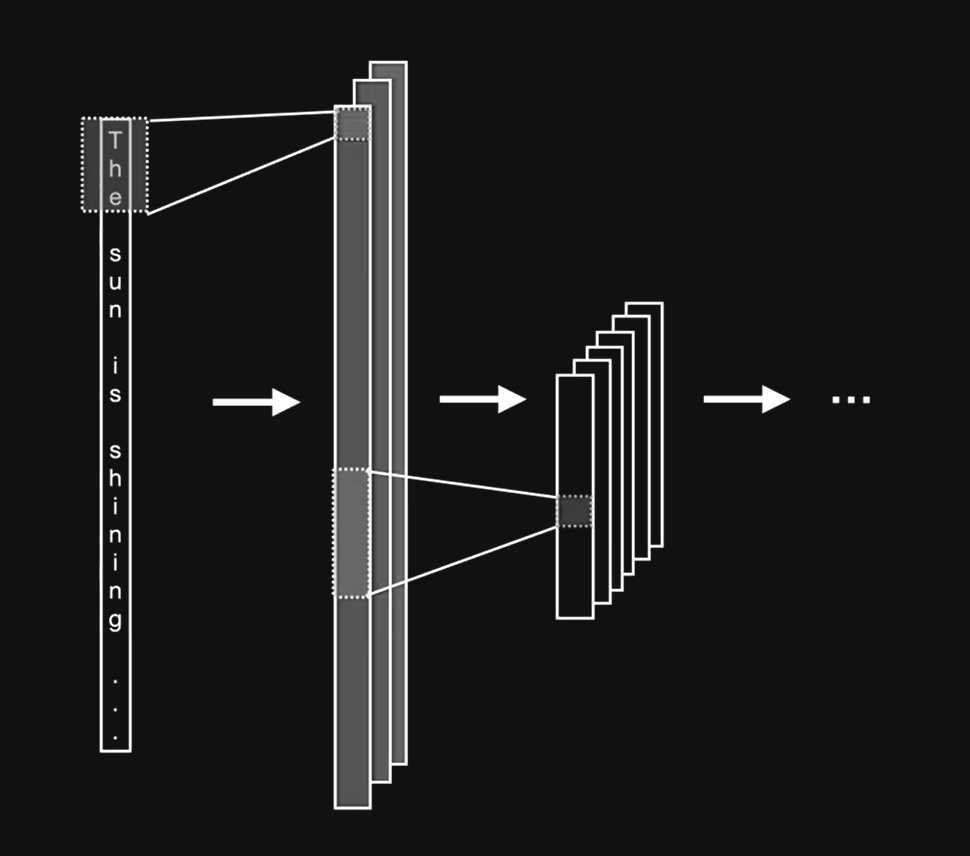

Dirbdami su vaizdais turėjome 2D konvoliucijas, o dabar turime 1D konvoliucijas ir vieną ilgą vektorių kuriame yra mūsų žodžiai paversti tarkime į individualių raidžių simbolių 

### Transformatoriai

Tai modernesnė technika ir apie pačius transformatorius mes kalbėsimės išsamiau šiek tiek vėliau. 2014 metais buvo sukurta technika kuri papildė RNN dėmesio mechanizmais ir kažkas 2017 sugalvojo kad galbūt reikėtų pamėginti atsisakyti pačiu RNN ir panaudoti vien tik dėmesio mechanizmus ir tai davė dar geresnius rezultatus, taip ir atsirado šie taip vadinami <code>**transformatorių modeliai**</code>. `bag of words` metodas gan  gerai dirba su mažso apimties duomenų rinkiniais, RNN reikia jau gerokai didesnių duomenų rinkinių, o transformatorias reika dar didesnių nei reikia RNN. Tipiniu atveju kai tyrėjai dirba su transformatoriais tai naudojami milijardai sakinių įvestis ir treniruojami šie modelia ant šimtų ir tūkstančių GPU branduolių ir tai dar trunka keletą dienų/savaičių ir šis procesas kainuoja beprotiškus pinigus kuriuos gali sau leisti tik didelės kompanijos kaip Google/Amazon/Meta ir pan. Kitas dalykas iš kur gauti etiketės šiems duomenims, tai tipiniu atveju transformatoriai ateiti rankon rankon su savarankiškai prižiūrimo mokymosi tehnika. Tai įvesties duomenų panaudojimo koncepcija generuoti prižiūrimo mokymosi etiketes. Pavydžiui BERT modelis yra du savrankiškai prižiūrimo mokymosi uždaviniai vienas yra tai kad yra užmaskuojama atsitiktinai 15% žodžių ir tada mėginama juos nustatyti/atspėti. Tarkime sakinys: `Šešios žąsys su šešiais žąsyčiais`, užmaskuojame žodį `žąsys` ir tada modeli yra taip apmokomas kad sugebėtu nustatyti koks turi būti žodis tokiame sakinyje, tiesiog nustatant didžiuliame žodine visų galimų žodžių tikimybė ir na tikimasi kad žodis `žasys` turės didžiausią tikimybę. Kita technika kuomet iš dokumento pašalinima <code>**2 sakiniai**</code> iš šio dokumento ir iš kito dokumento pašalinamas <code>**1 sakinys**</code>. Ir tada juos tarpusavyje  palygina kad modelis nustatytu iš kurio teksto yra šie sakinys ir kaip juos dera poruoti.

## Sekos modeliavimas su RNN

Kaip galime modifkuoti MLP (daugiasluoksnius perceptronus) kad jie pajėgtu fiksuoti sekos informaciją. Kaip žinoti ar mūsų modelis naudoja sekos informacija, tarkime logistinė regresija ar MLP ar šie modeliai naudoja sekų informacija ? Mūsų duomenų rinkinyje gali būti užkoduotos dvejų tipų sekos, viena seka yra per pačius duomenų pavyzdžius, o kitą seka per savybes. Jeigu pažiurėsime į vilkdagių duomenų rinkinį

In [129]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

In [130]:
data = pd.read_csv('../data_samples/iris.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Mes turime keturias savybes: sl, sw, pl, pw ir 150 duomenų pavyzdžių. Tai tipine duomenų paruošimo seka yra padalinti į treniravimo ir testavimo rinkinius. Tuomet modelį treniruoti su treniravimo duomenų rinkiniu. Žinoma sumaišome visus įrašus duomenų rinkiniuose nes rinkinyje pirmieji 50 pavyzdžių yra setosa, nuo 50 iki 100 yra virginica ir nuo 100 iki 150 versicolor rūšys. Tai mus reikia pasirūpinti kad rinkiniai būtų sumaišyti taip kad treniravimo ir testavimo rinkiniuose mes turėtume lygias dalis pavyzdžių. Ir atlikus šias proceduras kuomet darysime modelio vertinimą su testiniais duomeninis mes gausime (pageidautina) panašų tikslumą/efektyvumą. Šis modelis nenaudoja sekos informacijos, duomenys yra laikomi IID (independent and identically distributed), tai reiškia kad kiekviena įrašas yra nepriklausomas vienas nuo kito ir buvo surinktas nepriklausomai ir yra iš tos pačios gelių distribucijos.<br>
Jeigu mes sumaišysime savybių eiliškumą ar kažkas pasikeis dėl tikslumo, tarkime ji turime 98% ? Tarkime kad vietoje sl, sw, pl, pw bus pw, sl, sw, sl eiliškumas ar tikslumas nukris ar padidės ar niekas nesikies ?<br>



### Sekos duomenys tai kur tvarka svarbu

Prisiminkime tą `bag of words` modelį kuris turėjo žodyną ir atsikirato žodžių tvarkos savybių vektoriuje. Jei vertinsime šį pavyzdį:<br>

`The performance I have not seen is good`<br>
`The perfromance I have seen is not good `

Dvi skirtingos reikšmės, vienas yra pozityvus ir neigiamas sakinys. Jeigu mes naudosime `bag of words` modelį, kuriame tekstas yra žodžių dažnumas šį reikšmė bus prarastas nes abu sakiniai turi vienodą žodžių dažnį ir savybių vektorius bus identiškas. Šiuo atveju mes turime tvarkos informacija todėl eiliškumas yra svarbu. Ir RNN mums padeda fiksuoti šią tvarkos informacija.

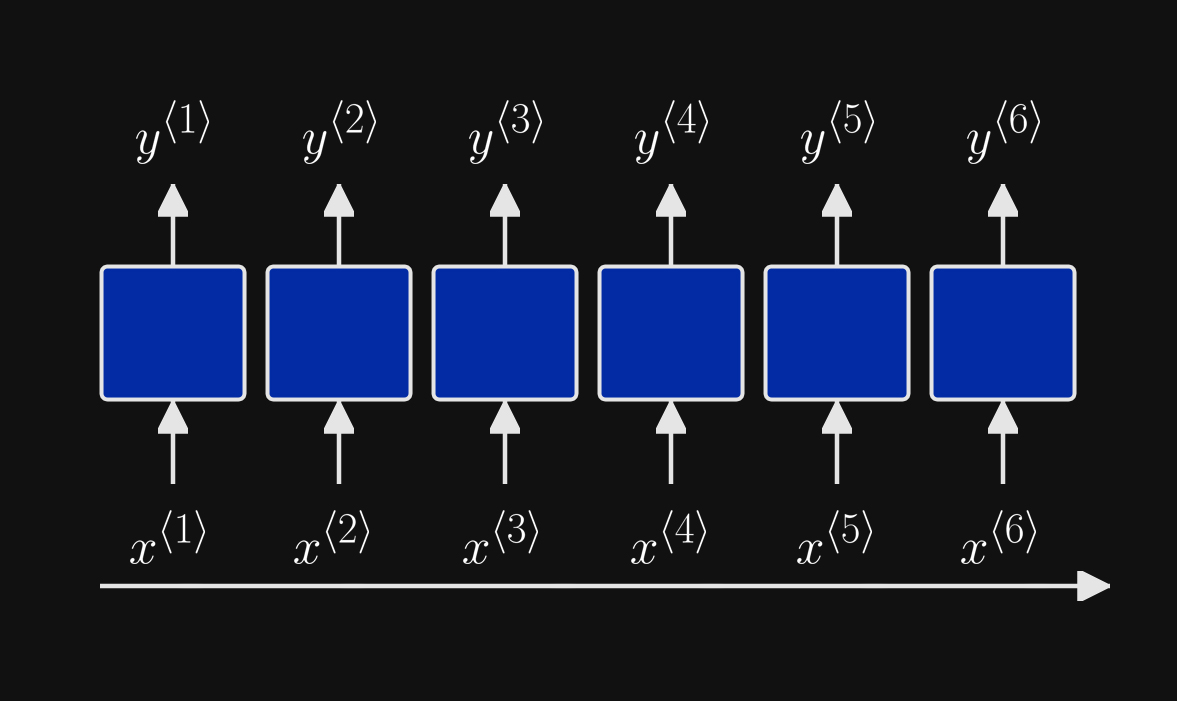

Prieš tai mes dirbome su `feedforward tipo neuroniniai tinklais`, tai buvo logistinė regresija, daugiasluoksnis perceptronas, konvoliuciniai neuroniniai tinklai. Tipiškai turėjo įvesties vektorių x tada paslėptus sluoksnius ir išvesties sluoksnį. Pakartotinio (rekurentinio) neuroninio tinklo struktūroje mes turi <code>**grįžtamajį, pasikartojantį ryšį**</code>. Mes tai pat turime laiko (sekos) žingsnį <b>𝑡</b> ir turime savybių vektorių laiko momentu <b>𝑡</b>, kuris duodas paslėptam sluoksniui (būsenai) ir išvestis laiko momentu <b>𝑡</b>. Ir paslėptame sluoksnyje vieto vienos x įvesties tai pat dar gauna signalą/įvestį iš prieš tai buvusio laiko momento <b>𝑡-1</b>. Šis neuronis tinklas gauna informaciją iš praietų laiko momentų.

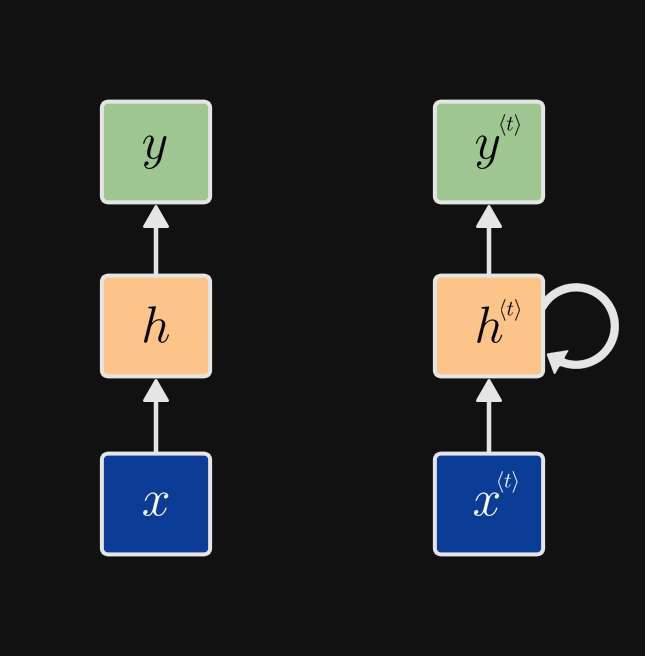

Žiurint į išsiskleistą šio tinklo struktūrą tarkime su trimis laiko momentais turėsime tokią struktūrą. Jeigu nagrinėje centrinę tinkla dalį laiko momentu <b>𝑡</b>. Paslėpto sluoksnuo vienetas gauna signalus iš <b>𝑥 vektoriaus</b> laiko momentu <b>𝑡</b> ir tai pat informacija iš paslėpto sluoksnio  būsenos prieš tai buvusio laiko momento <b>𝑡 - 1</b>. Tokia tinklo architektūra leidžia jam turėti nuovoką apie seką (laiko). 

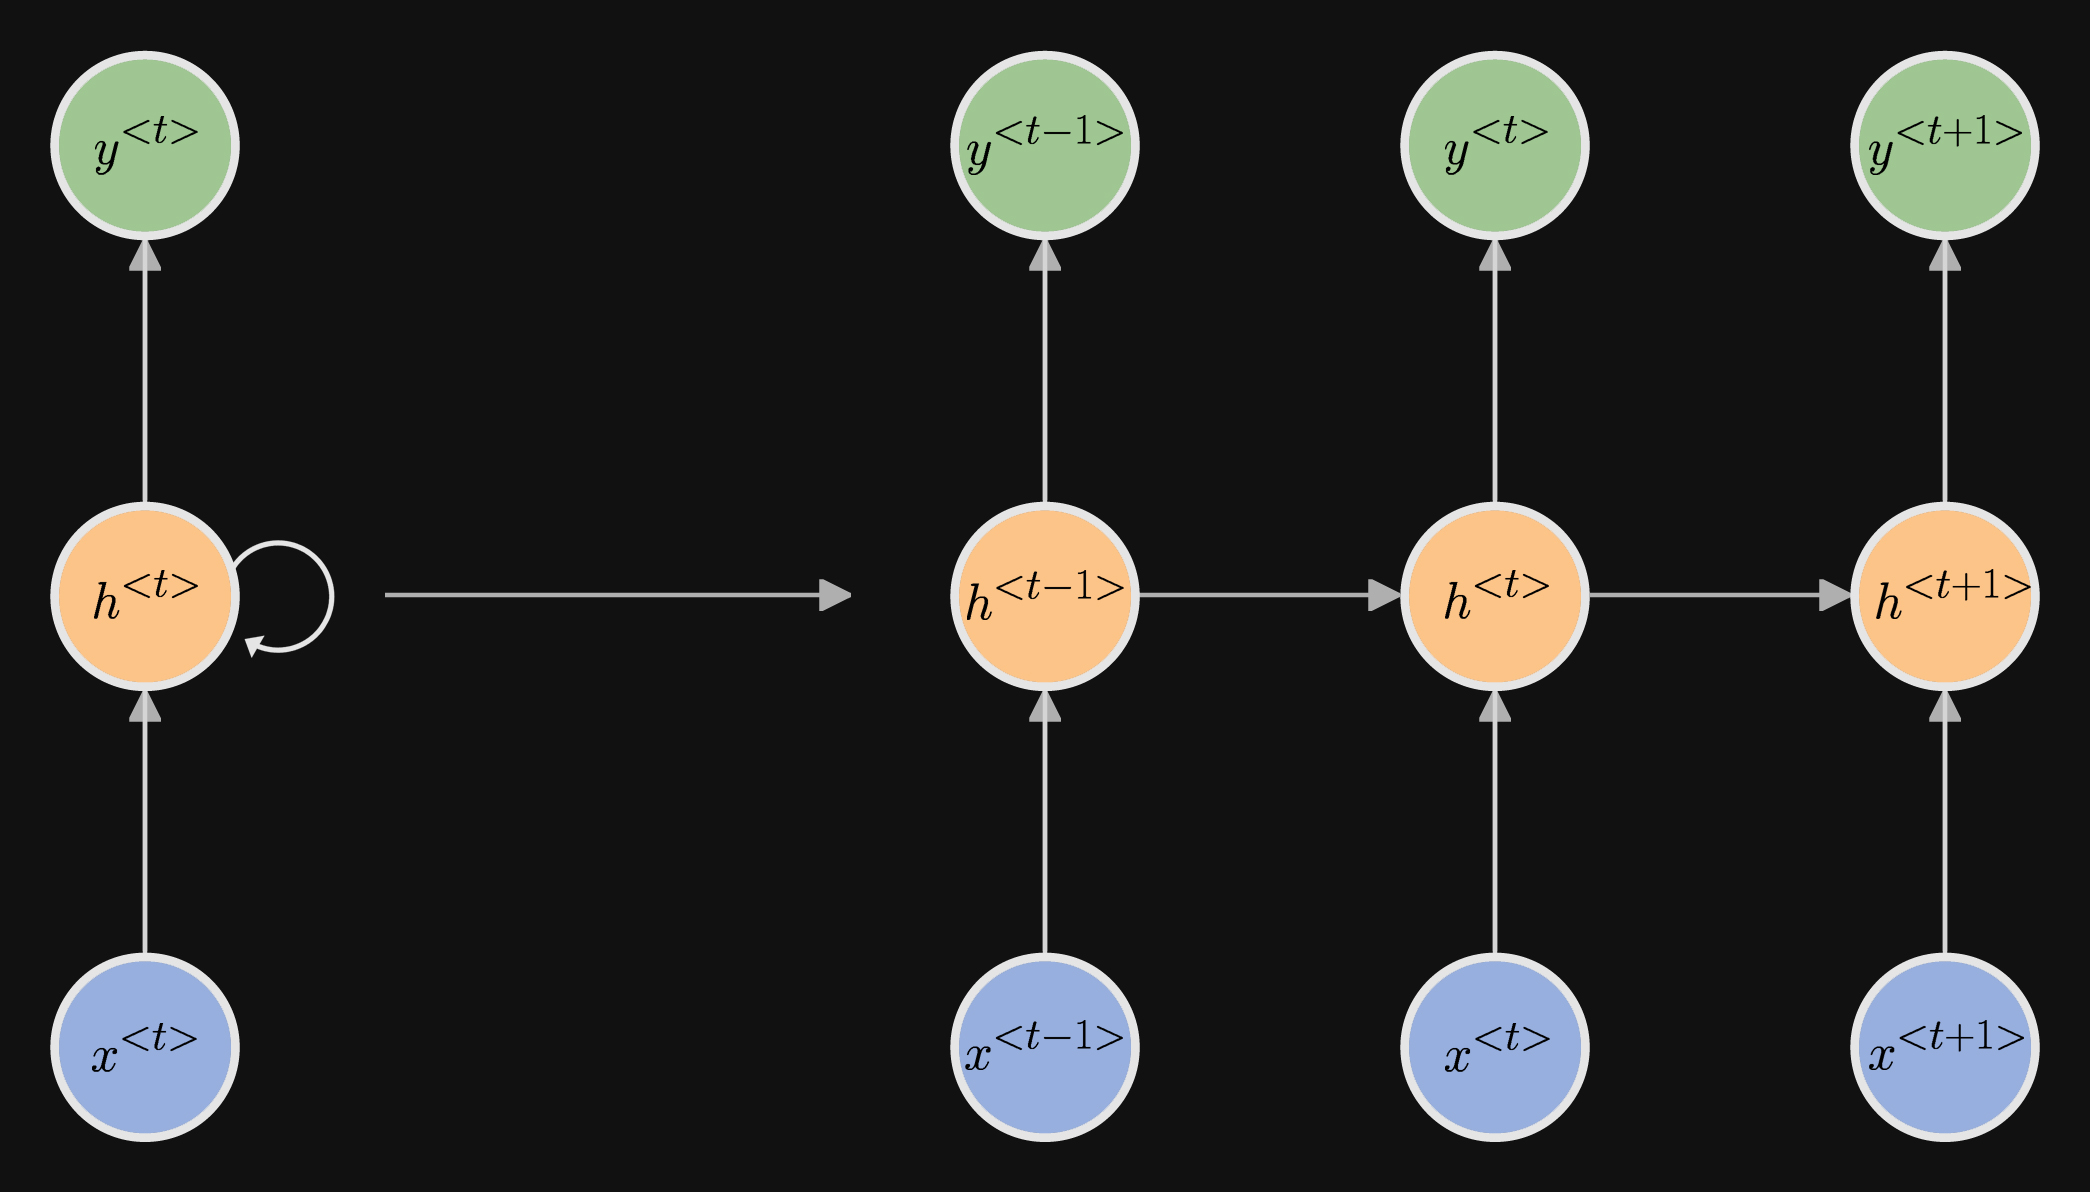

## Įvairių tipų sekos modeliavimo užduotys

RNN architektūros neuroninius tinklus galime taikyti skirtingoms sekų modeliavimo (sekvenavimo) užduotims. Yra 4 pagrindinės sekvenavimo užduotys.
 - <code>**Many to one:**</code> Įvesties duomenys yra seka, bet išvestis yra fiksuoto dydžio vektorius, o ne seka. Pavyzdžiui, sentimentų - nuotaikų analizė, knygų/filmų/pasirodymų apžvalga, įvestis tokiu atveju yra tam tikras tekstas, o išvestis yra klasės etiketė
 - <code>**One to many:**</code> Įvesties duomenys yra standartinio formato (ne seka), išvestis yra seka. Pavyzdžiui, vaizdo antraštės, kai įvestis yra vaizdas, išvestis yra to vaizdo tekstinis aprašymas (tai gali būti kombinuotas CNN ir RNN tinklas tokiam uždaviniui spręsti).
 - <code>**Many to many (direct, delayed):**</code>  Tiek įvestis, tiek išėjimai yra sekos. Gali būti tiesioginis (direct) arba atidėtas (delayed). Pavyzdžiui, vaizdo įrašų antraštės, apibūdinančios vaizdų seką per tekstą (tiesiogiai). Vienos kalbos vertimas į kitą (atidėtas).


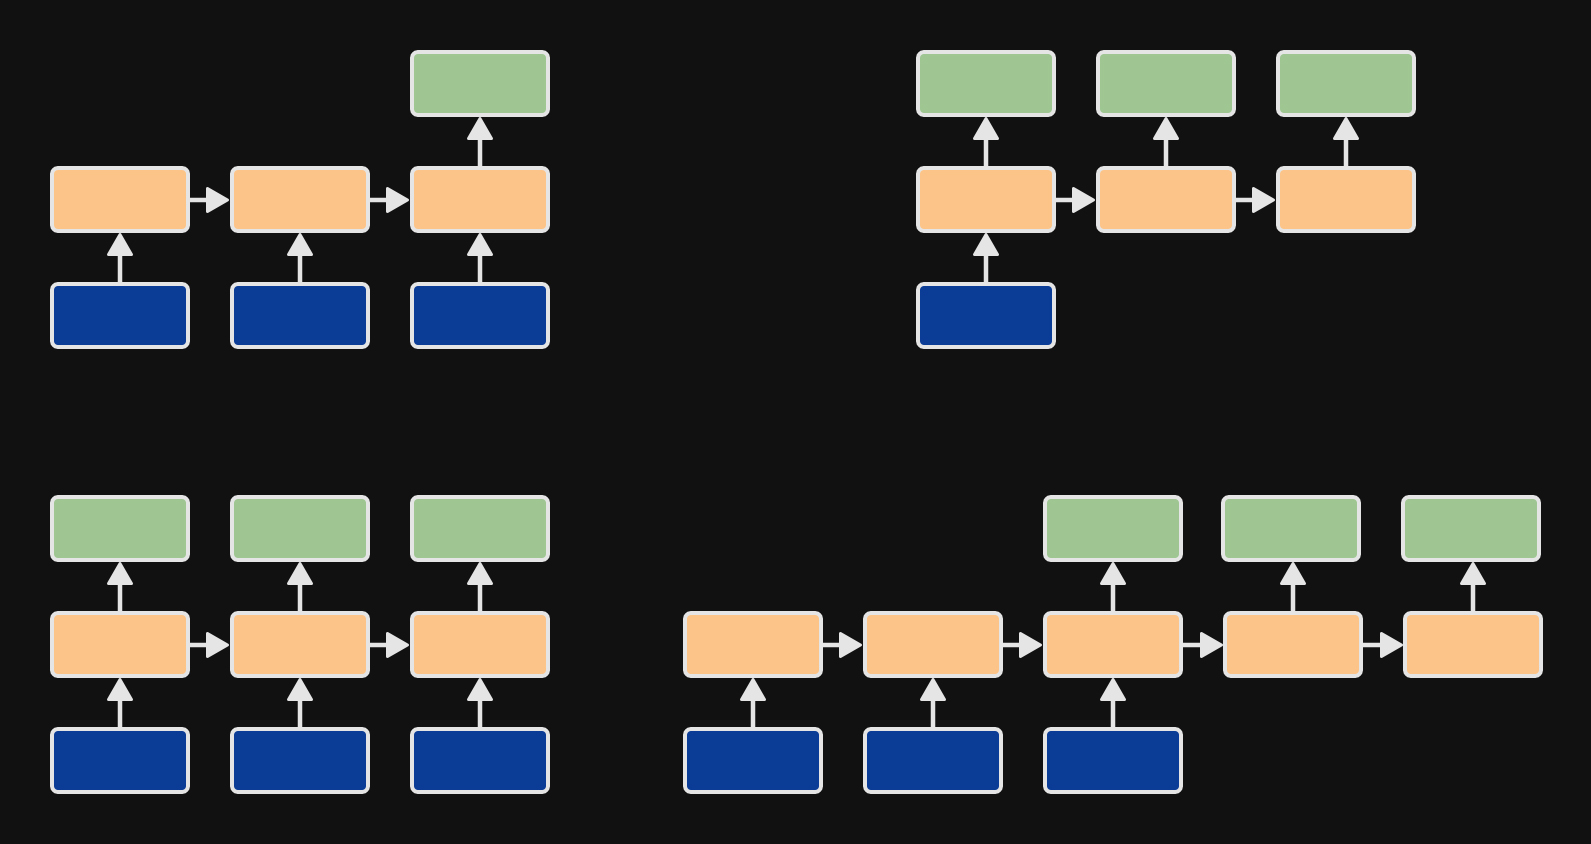

Atidėtos sekos uždavinys tai dažniausiai yra vertimo iš kalbos į kitą kalbą operacija. Tarkime turime sakinį lietuviškai ir verčiame į anglų. Jei tai būtų daroma tiesiogiai tai sakiniai būtų verčiami pažodžiui kaip iš žodyno ir to mes nenorime nes tai bus nekokybiškai atliktas uždavinys. Kalba yra labiau komplikuota koduotė nei vien žodžių vertimas, skirtingos kalbos turime skirtingas gramatikos, sintaksės ir morfologijos taisykles. Turime pirmą perskaityti visą sakyti ir tik tada generuoti vertimą.

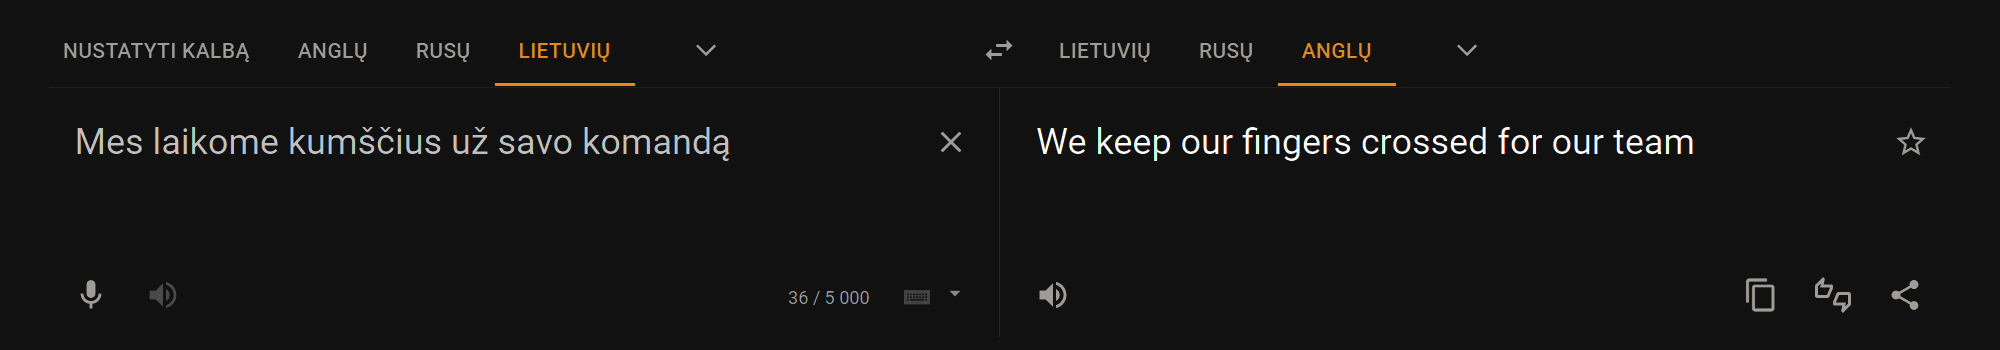

## Atgalinis skaičiavimas (backpropagation) per laiką

Tai tas pats algoritmas su kuriuo jau esame pažįstami ir ne kartą naudojome išskyrus tai kad dabar pasižiūrėsime kaip jis veikia jeigu turime laiko dimensiją. 

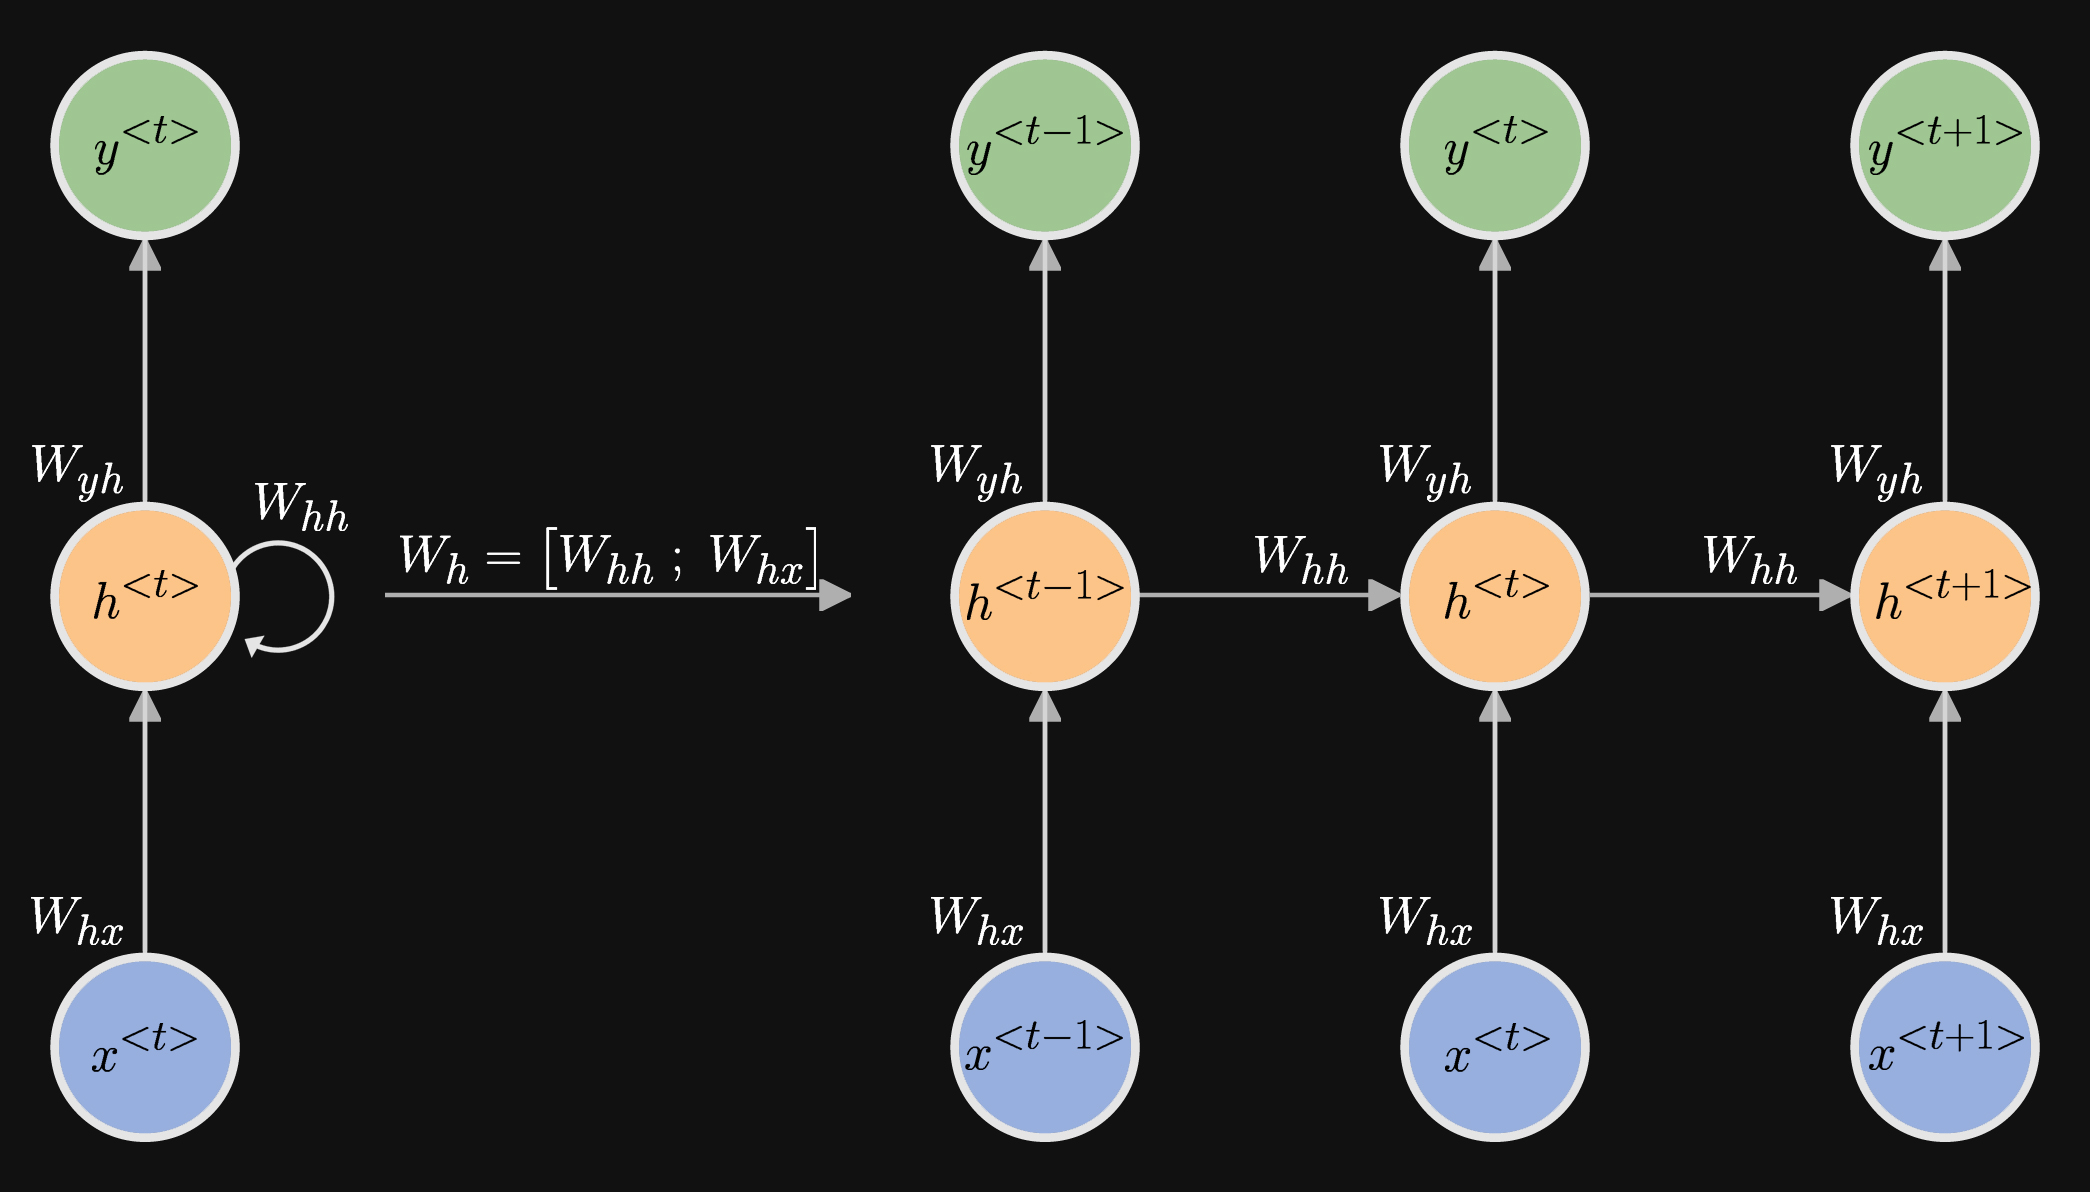

Čia vieno sluoksnio RNN , kairėje pusėje yra kompaktiška notacija kurioje matome įvestį ir išvestį ir paslėptajį sluoksnį su rekurentiniu procesu. Kuo tai skiriasi nuo MLP tai papidlomos svorių matricos:<br>

\begin{multline*}
W_{yh}, W_{hh}, W_{hx}
\end{multline*}

Viena matrica sujungia įvestį su paslėptu sluoksniu, ir kita sujungianti paslėptą sluoksni su išvesties sluoksniu. Tai svoriu matricos kurias naudojame tipiniame daugiasluoksnyje perceptrone. Rekurentinio (pakartotinio) tinklo atveju mes turime papildoma trečia kuri yra iš praeitos paslėptos būsenos. RNN tinkle turime dvi matricas paslėptame sluoksnyje.

\begin{multline*}
W_{h} = 
\begin{bmatrix}
W_{hh} \ ; \ W_hx
\end{bmatrix}
\end{multline*}

Dešinėje diagromos pusėje yra išskleista versija kurioje matosi kad mes pernaudojame šias matricas. Kiekvienu laiko momentu naudojame tas pačias matricas jungiančias įvestį ir paslėptą sluoksnį. Ir tas pačias matricas paslėptame sluoksnyje kiekvienam laiko momentu ir matricas kurios jungia paslėptą sluoksnį su išvestimi. Kuo tai skiriasi nuo MLP tai kad turime W_{hh} matricas. 

<code>**Bendrinė įvestis:**</code>

\begin{multline*}
z^{<t>}_{h} = \mathbf{x^{<t>}}^{\top} \mathbf{W}_{hx} +  \mathbf{h^{<t-1>}}^{\top} \mathbf{W}_{hh}  + \mathbf{b}_{h}
\end{multline*}

    
<code>**Aktivacija:**</code><br>
    
\begin{multline*}
h^{<t>} = \sigma_{h}(\mathbf{z}^{<t>}_{h})
\end{multline*}
    

Skaičiavimai labai panašus išskyrus tai kad turime dvi svorių matricas ir dvi įvestis. Dvejų įvesčių ir dvejų svorių matricų produktų suma plius poslinkis (b). Aktivacijai ar tai būtų sigmoid ar tanh ar ReLU viskas yra tas pats.

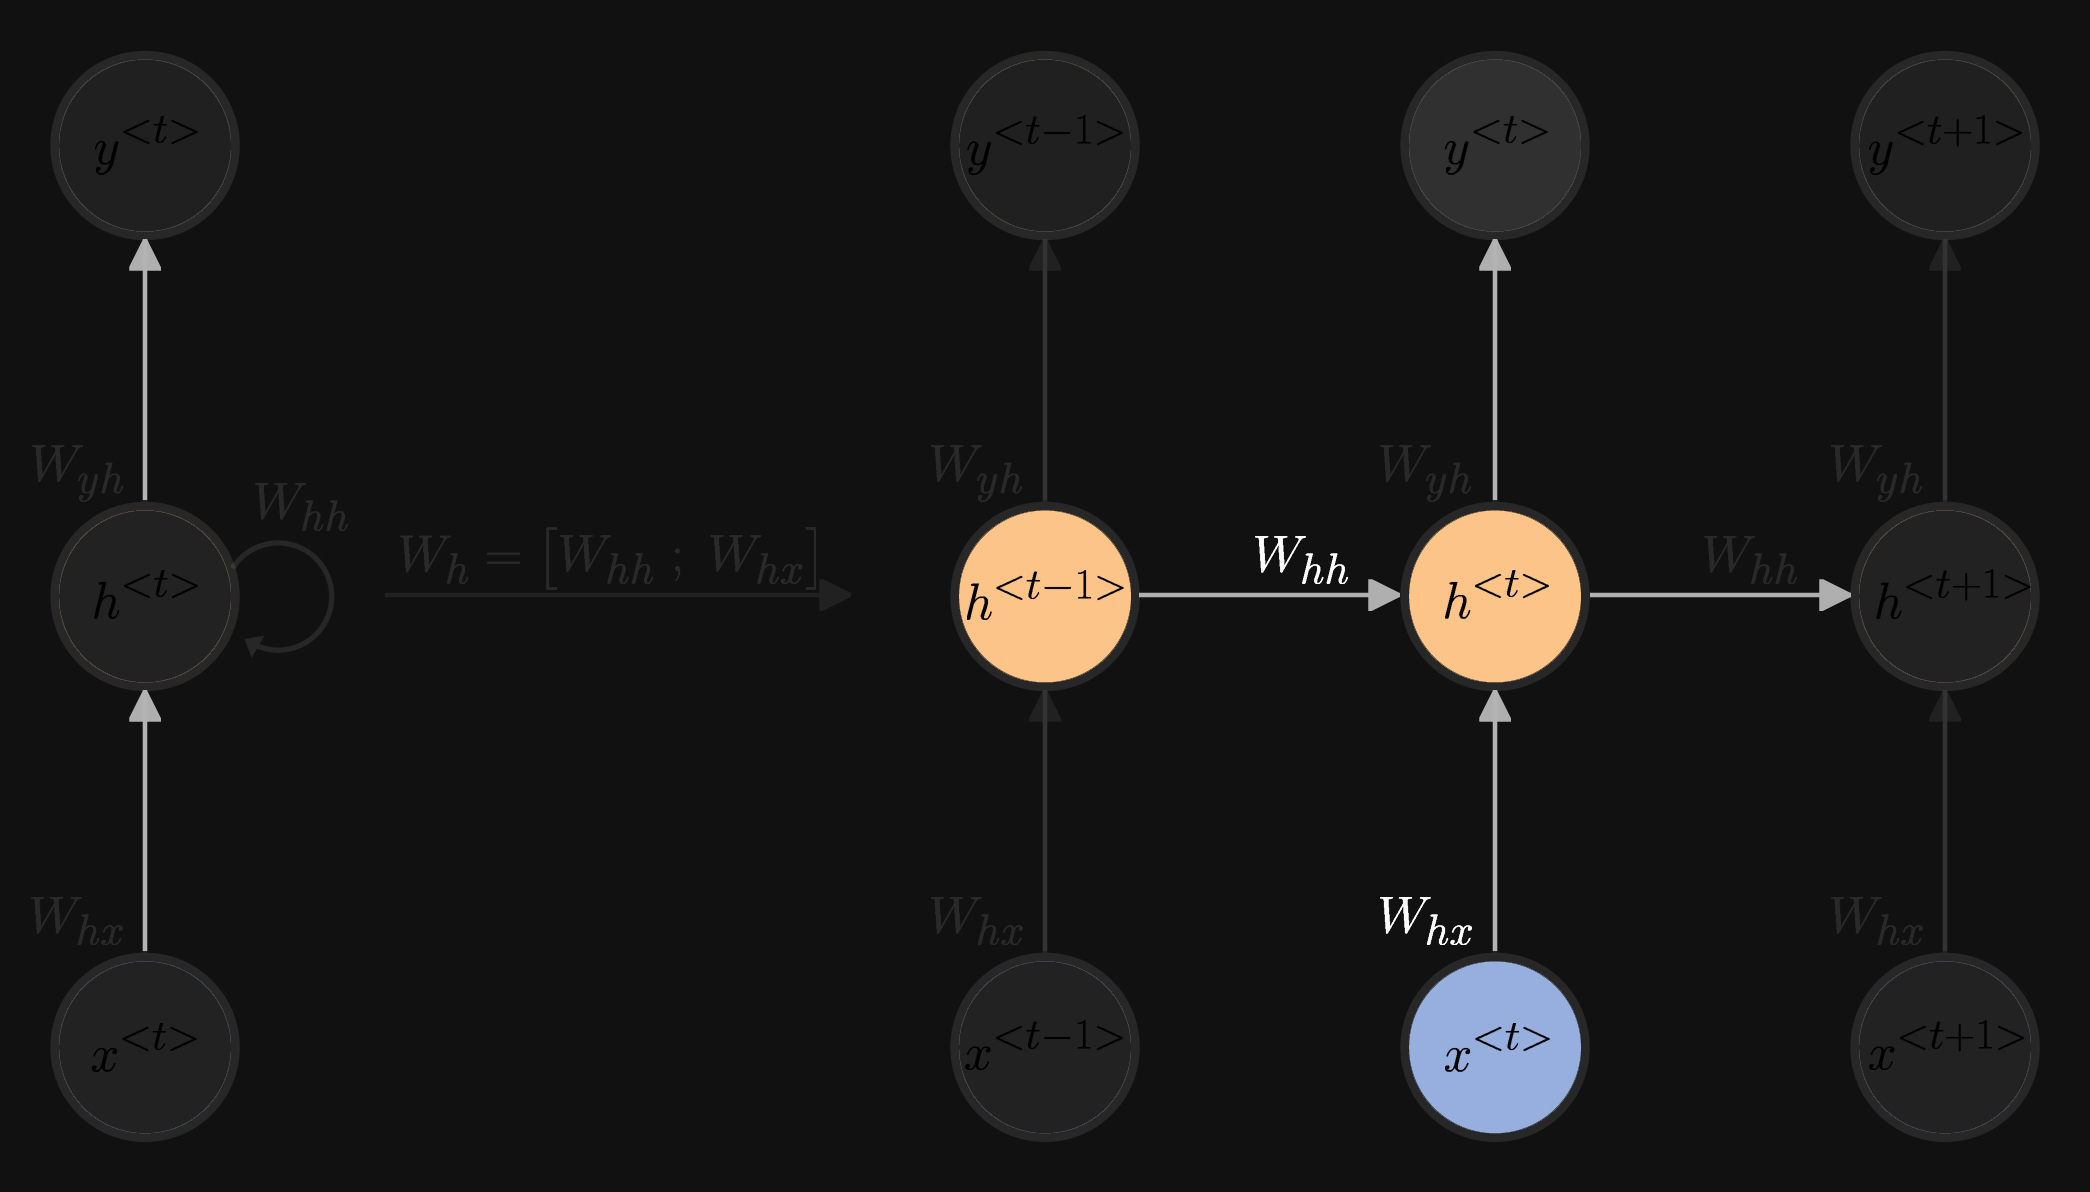

<code>**Bendrinė įvestis:**</code>

\begin{multline*}
z^{<t>}_{y} = \mathbf{h^{<t>}}^{\top} \mathbf{W}_{yh}  + \mathbf{b}_{y}
\end{multline*}

    
<code>**Išvestis:**</code><br>
    
\begin{multline*}
y^{<t>} = \sigma_{y}(\mathbf{z}^{<t>}_{y})
\end{multline*}

Dėl kainos skaičiavimu tai labai priklauso nuo to kokio tipo uždavinys ir koks yra sekos modeliavimo uždavinys. Tarkime jeigu norima nustatyti vieną etiketę duotam tarkyme teksto pavyzdžiui techniškai nereikia skaičiuoti visus kainos funkcijų tik ta kuri yra paskutinė. Bet jeigu mūsų seka yra `many to many` tuomet mums reikia šių visų kainų skaičiavimų. 
Daugiau išsamesnės informacijos apie RNN atgalinį skiačiavime rasite šioje publikacijoje [Backpropagation through time: what it does and how to do it](https://www.researchgate.net/publication/2984354_Backpropagation_through_time_what_it_does_and_how_to_do_it).

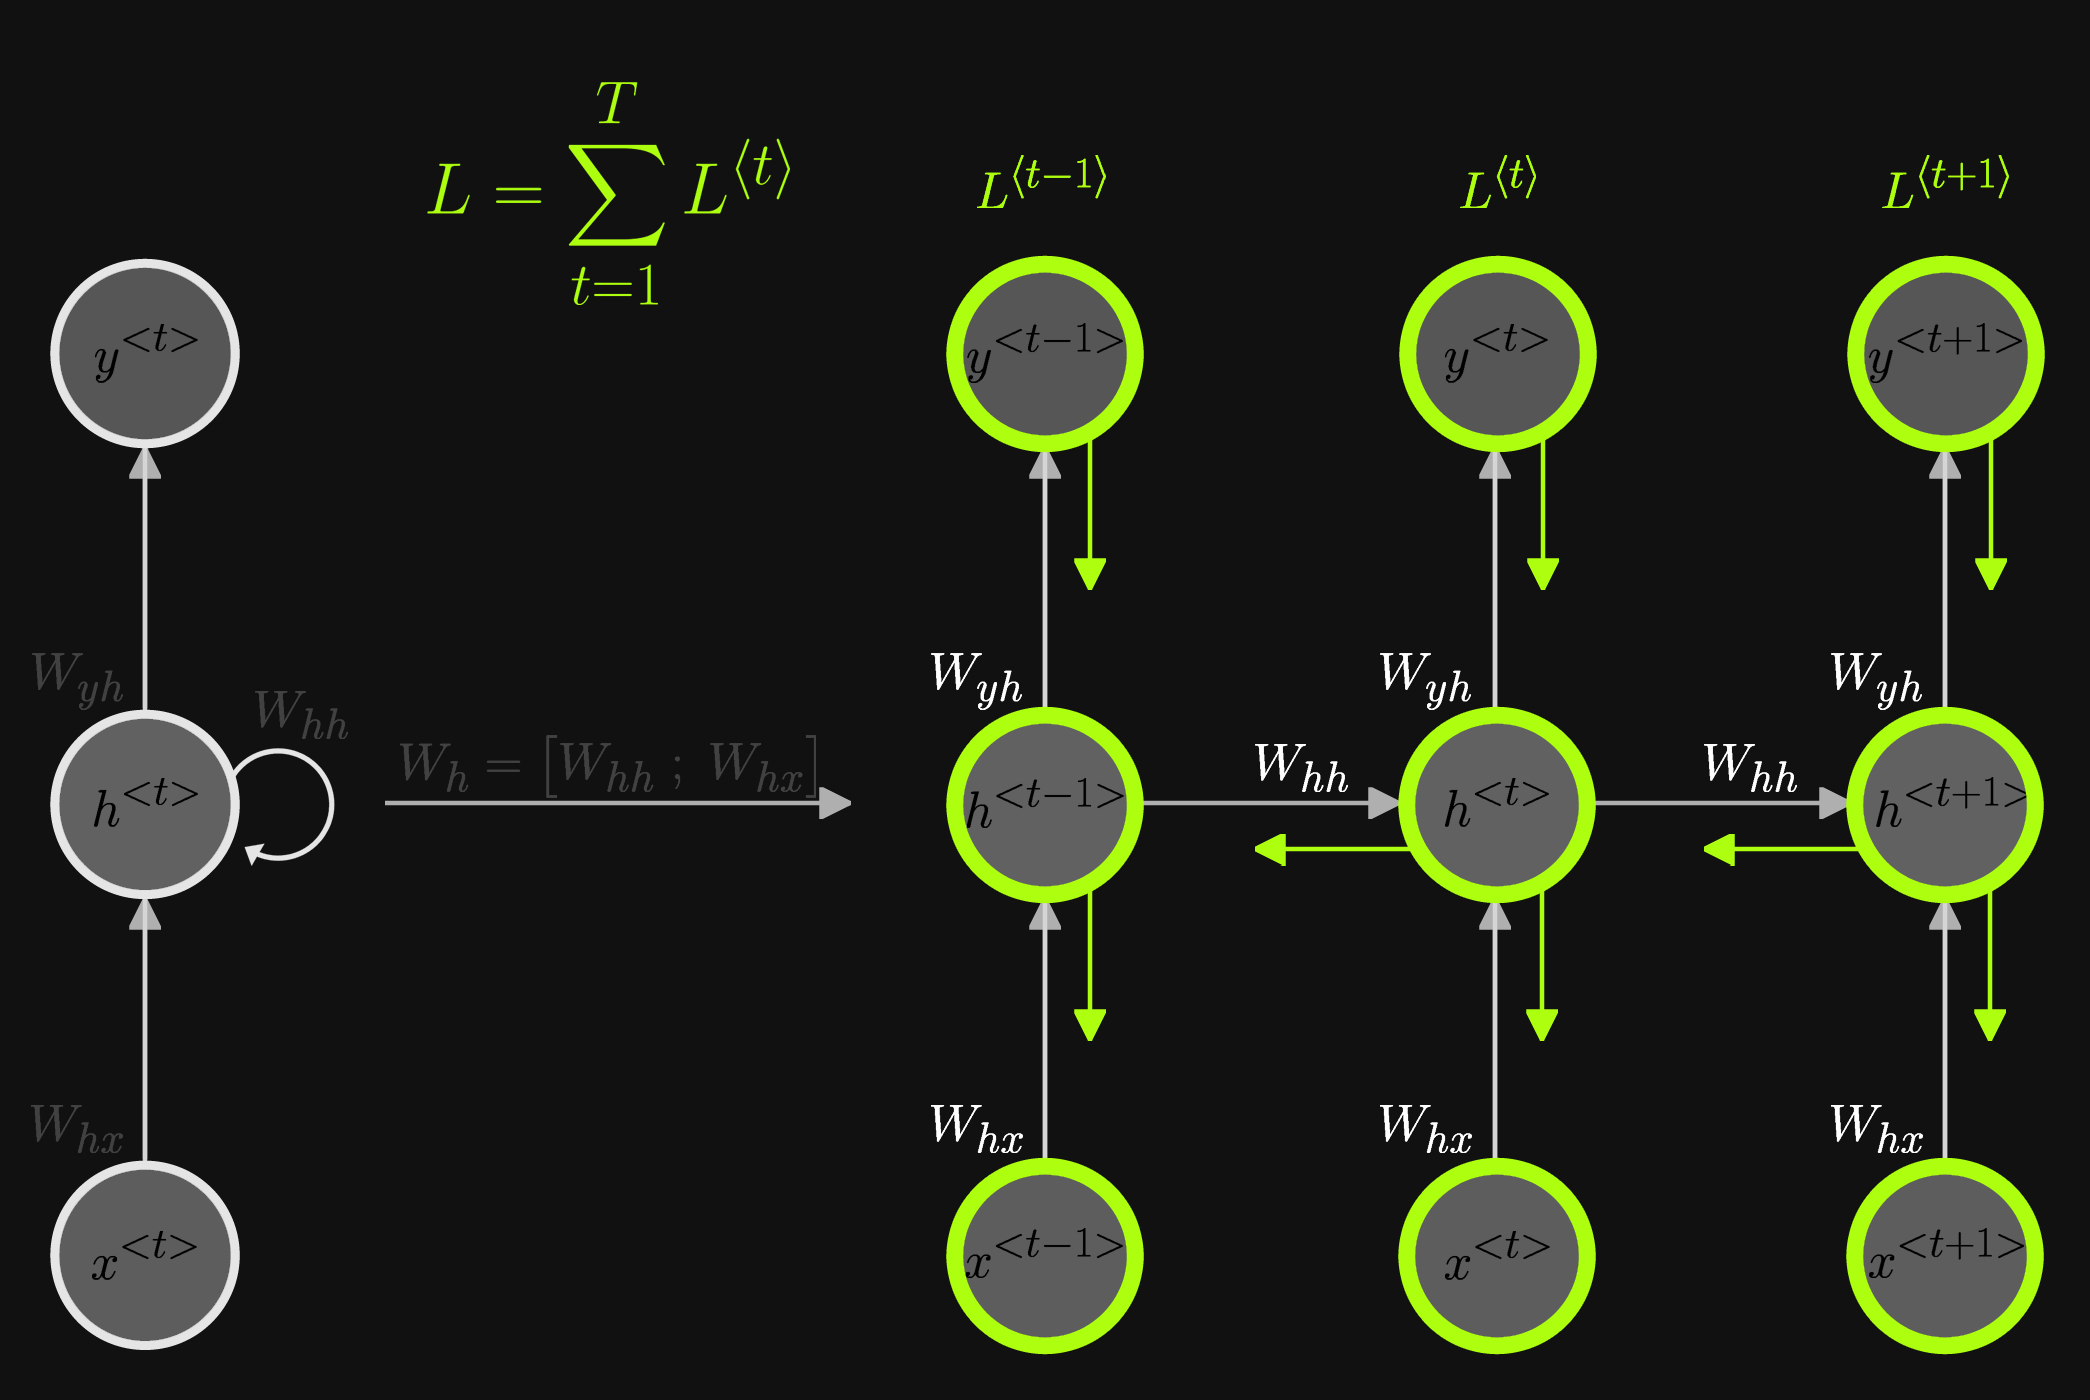

Kaip skaičiuojamas konkrečios kainos gradientas, konkrečiu laiko momentu <t> atsižvelgiant į paslėpto sluoksnio svorių matrica 𝐖ℎℎ. 

\begin{multline*}
L = \sum^{T}_{t=1} L^{(t)}
\end{multline*}

\begin{multline*}
\dfrac{\partial L^{(t)}} {\partial \mathbf{W}_{hh}} =  \dfrac{\partial  L^{(t)}}{\partial y^{(t)}} \cdot \dfrac{\partial y^{(t)}}{\partial \mathbf{h}^{(t)}} \cdot (\sum^{t}_{k=1} \dfrac{\partial \mathbf{h}^{(t)}}{ \partial \mathbf{h}^{(k)}} \cdot \dfrac{\partial \mathbf{h}^{(k)}}{\partial \mathbf{w}_{hh}})
\end{multline*}

Apskaičiuojamas kaip gretimų laiko žingsnių padauginimas. Tai labai problemiška dėl nykstančio ir sprogstančio gradiento problemos jeigu operacijos terminai yra labai maži arba labai dideli.

\begin{multline*}
\dfrac{\partial \mathbf{h}^{(t)}}{ \partial \mathbf{h}^{(k)}} = \prod^{t}_{i = k + 1} \dfrac{\partial\mathbf{h}^{(i)}}{\partial\mathbf{h}^{(i-1)}}
\end{multline*}

## LSTM - ilgalaikė trumpalaikė atmintis

Tai metodas skirtas ilgo nuotolio priklausomybių modeliavimui. LSTM gali laikyti modifikuota RNN versija kuri yra labai veiksminga dirbant su ilgomis sekomis.

### Nykstančio/sprogstančio gradiento problemos sprendimai

Kai kalbėjomės apie MLP ties šia problema tai kaip sprendimas buvo vietoje sigmoid aktivacijos naudoti ReLU aktivacija. Bet praktikoje jeigu MLP turi daugiau paslėptų sluoksnių 2-3 tai jau nebeveiks taip gerai. Spręsti šią problema padeda `BatchNorm` paketo normalizacija. Kaip ir su CNN ši problema ryškiai atsiranda virš 16 sluoksnių, todėl kaip spręndimas atsirada technika kuri praleidžia jungtis `ResNet`. Yra daugybe skirtingų triukų kaip galima spręsti nykstančio/sprogstančio gradiento problemas.
Tik tai kad šios technikos nelabai tinka rekurentiniam neuroniniam tinklui nes mums tai pat reikia vertinti laiko žingsnius, prieš tai buvusias paslėptas būsenas. Yra kelos technikos:

- <code>**Gradiento iškirpimas:**</code> nustatykite maksimalią gradientų vertę, jei jie išauga iki didelių (išsprendžia tik sprogstamojo gradiento problemą)

- <code>**Sutrumpintas atgalinis dauginimasis laikui bėgant (TBPTT):**</code> Tiesiog apriboja laiko žingsnių skaičių, kuriais signalas gali sklisti atgal po kiekvieno praėjimo į priekį. Pvz., net jei seka turi 100 elementų / žingsnių, signalas skaičiuojamas atgal tik maždaug 20 žigsnių.

- <code>**Ilgalaikė trumpalaikė atmintis (LSTM):**</code> naudojama atminties cele ilgo nuotolio priklausomybėms modeliuoti ir išvengti išnykusių gradiento problemų. Daugiau informacijos galima rasti šioje publikacijoje [Long short-term memory](https://www.researchgate.net/publication/13853244_Long_Short-term_Memory). 

- <code>**GRU:**</code>gatted recurrent unit yra supaprastina LSTM versija, daugiau informacijos rasite šiame `towardsdatascience.com` [straipsnyje](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

### LSTM celė

Štai kaip atrodo ši celė ir čia vyksta daug procesų ir aptarsime žingsnis po žingsnio. Ši celė yra lokalizuota `vietoje paslėpto sluoksnio vieneto` konkrečiam laiko žignsiui ir jeigu tai yra MRNN (daugiasliuosknis rekurentinis neurononinis tinklas) gali būti daugybė tokių LSTM celių.

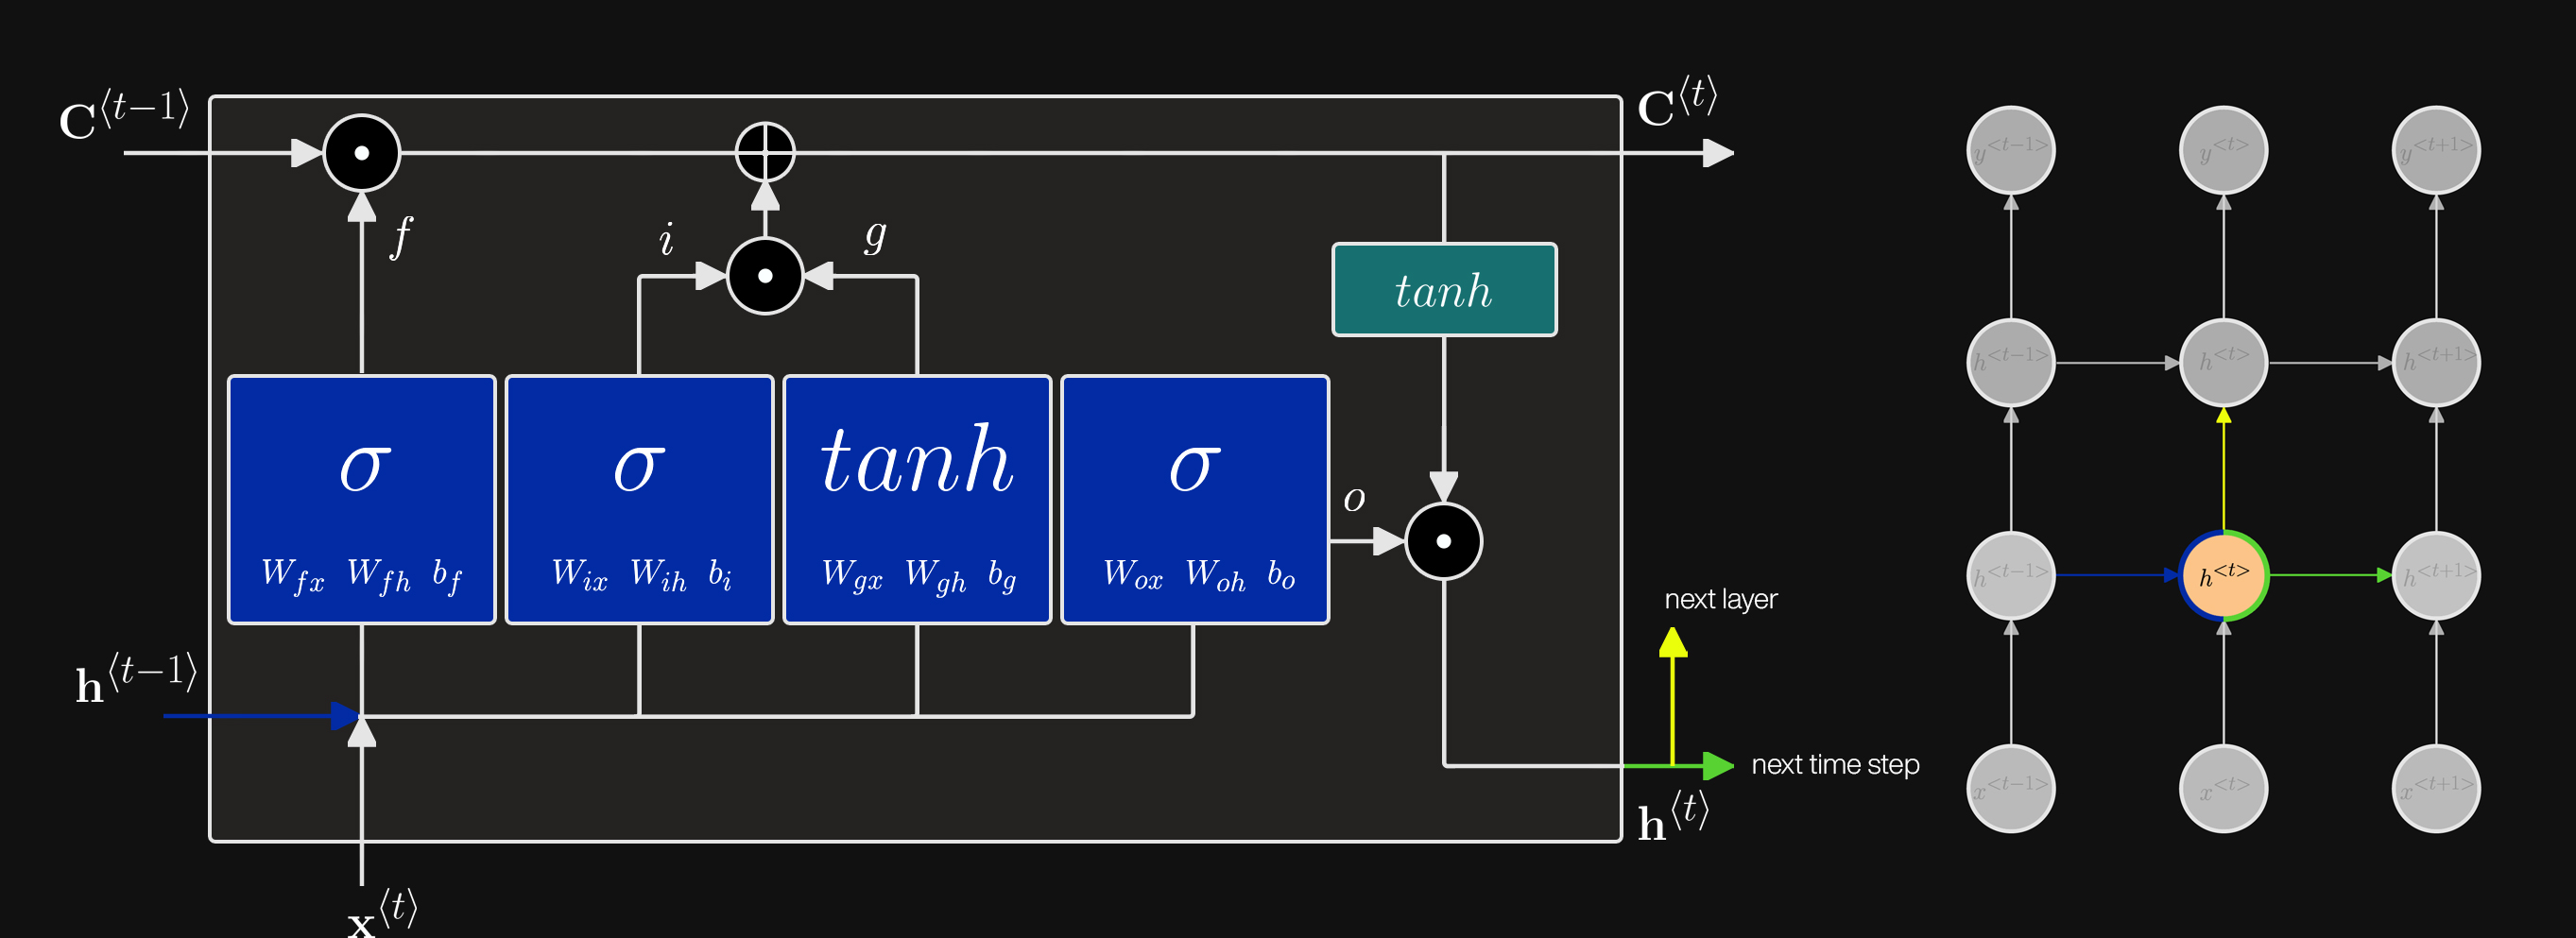

LSTM busena susideda iš:

-  celės būsena ankstesniame laiko etape
\begin{multline*}
C^{\langle t-1 \rangle}
\end{multline*}


- celės būsena dabartiniu laiko žingsniu
\begin{multline*}
C^{\langle t\rangle}
\end{multline*}


Tai pat turime aktivacija iš ankstensnio laiko etapo ir tai pat perleisime aktivacija iš šios celės skaičiavimų į kitą etapą:

\begin{multline*}
h^{\langle t-1 \rangle}
\end{multline*}


\begin{multline*}
h^{\langle t \rangle}
\end{multline*}

<code>**Element wise multiplication operator**</code>

\begin{multline*}
\odot 
\end{multline*}

<code>**Element wise addition operator**</code>

\begin{multline*}
\oplus 
\end{multline*}

Yra trijų tipi vartai:<br>
<code>**1. Pamiršimo vartai (𝑓)**</code> kurie kontroliuoja kurią informaciją atsiminti, o kurią pamiršti iš naujo nustatant celės būseną, pamirštant prieš tai buvusią [0, 1].

\begin{multline*}
f_{t} = \sigma(\mathbf{W}_{fx}\mathbf{x}^{\langle t \rangle} + \mathbf{W}_{fh}\mathbf{h}^{\langle t-1 \rangle} + \mathbf{b}_{f}
\end{multline*}

Šie du 2 ir 3 elementai yra dauginami ir pridedami prie prieš tai buvusios celės busenos kuri gali būti pamiršta arba išlaikyta.<br>
<code>**2. Įvesties vartai (i)**</code> reikšmė gali būti [0,1]

\begin{multline*}
i_{t} = \sigma(\mathbf{W}_{ix}\mathbf{x}^{\langle t \rangle} + \mathbf{W}_{ih}\mathbf{h}^{\langle t-1 \rangle} + \mathbf{b}_{i}
\end{multline*}

<code>**3. Įvesties mazgas (g)**</code> reikšmė gali būti [-1,1]

\begin{multline*}
g_{t} = \tanh(\mathbf{W}_{gx}\mathbf{x}^{\langle t \rangle} + \mathbf{W}_{gh}\mathbf{h}^{\langle t-1 \rangle} + \mathbf{b}_{g}
\end{multline*}

Rezultatas yra iš operacijų kurios nusako ar pamiršti prieš tai buvusią celės buklę ir ar pridėti naują informaciją apie celės buklę.

\begin{multline*}
C^{\langle t \rangle} = ( C^{\langle t-1 \rangle} \odot f_{t}) \oplus (i_{t} \odot g_{t})
\end{multline*}


<code>**4. Išvesties vartai (0)**</code> kurių operacijos reikšmė atnaujinti paslėpto sluoksnio reikšmes
\begin{multline*}
o_{t} = \sigma(\mathbf{W}_{ox}\mathbf{x}^{\langle t \rangle} + \mathbf{W}_{oh}\mathbf{h}^{\langle t-1 \rangle} + \mathbf{b}_{o}
\end{multline*}

<code>**5. Skaičiuojama sekančios paslėptos busenos reikšmė**</code>

\begin{multline*}
h^{\langle t \rangle} = \mathbf{o}_{t} \odot \tanh(\mathbf{C}^{\langle t \rangle})
\end{multline*}


Tai gan komplikuota struktura kuri turi visų šių operacijų pagristumą kuri galima rasti autoriaus publikacijoje. Praktikoje tai veikia labai gerai todėl ši koncepcija išlaiko laiko testą ir yra gana populiari. Tačiau yra versija kuri buvo sukurta 2014 metais mėginant supaprasti šią koncepcija su mažiau parametrų, taip atsirado `GRU - gatted recurrent unit` apie kurią rasite išsamios informacijos šioje publikacijoje [Learning Phrase Representations using RNN Encoder–Decoder for Statistical Machine Translation](https://arxiv.org/pdf/1406.1078.pdf) ir publikacijoje kurioje tyrinėjamos ir palyginamos LSTM ir GRU [An Empirical Exploration of Recurrent Network Architectures](https://proceedings.mlr.press/v37/jozefowicz15.pdf)

## RNN klasifikavimui: Many to One Word RNN

Implemntuosime RNN su LSTM kaip klasifikatorių kuris klasifikuoja tekstą. Tai bus `many to one` žodžių RNN, nuskaitysime tekstą ir laikysime kiekvieną žodį kaip ženklą (token) sekoje. Aptarsime veiksmus būtinus šiai užduočiai atlikti ir tuomet tai suprogramuosime. Kadangi kalbamės apie klasifikacijos uždavinį todėl tai yra `many to one` tinklas, mes turime įvestį sakinį ir išvestis yra klasės etiketė. Pasinaudosime IMDB filmų peržiūros/vertinimo duomenų rinkiniu ir mėginsime prognozuoti ar filmo aprašymas yra pozityvus ar neigiamas. Viskas kuo tai bus panašu į jau aptartą `bag of words` modelį tai kad mums taip pat reikės žodyno `vocabulary`. Vietoje dizaino matricos <b>𝐗</b> kaip įvestį algoritmui turėsime įterpimą `embedding`, žodžių įterpimą. 

Ši procedura turi 4 žingsnius:

 1. Sukurti žodyną iš unikalių žodžių esančių duomenų rinkinyje.

In [133]:
x1 = 'The sun is shinning'
x2 = 'The weather is sweet'
x3 = 'The sun is shinning, the weather is sweet, and one and one is two'

In [32]:
y = [0, 1, 0]

In [33]:
vocabulary = {
    '<unk>'   : 0,
    'and'     : 1,
    'is'      : 2,
    'one'     : 3,
    'shining' : 4,
    'sun'     : 5,
    'sweet'   : 6,
    'the'     : 7,
    'two'     : 8,
    'weather' : 9,
    '<pad>'   : 10
}

Šiame žodyne turime du papildomus įrašus <code>**unk**</code> ir  <code>**pad**</code>. Tai nežinomiems simboliams ir tarpeliams kurie reikalingi kad padarytume sekas vienodo ilgio.


 2. Mokymo pavyzdžių teksto pavertimas į indeksus naudojant žodyną ir išlaikant žodžių tvarką. Mokymo pavyzdžiai turi būti vienodo ilgio jeigu norime RNN mokyti su pakuotėmis (dėl tiesinės algebros operacijų) kitu atveju jeigu mokytumė po vieną sakinį jie gali būti skirtingo dydžio.

In [140]:
x1_i = [7, 5, 2, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
x2_i = [7, 9, 2, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
x3_i = [7, 5, 2, 4,  7,  9,  2,  6,  1,  3,  1,  3,  2,  8]

 3. Indeksų konversija į one-hot reprezentaciją kurio kolonos yra žodynos dydis, o eilutės sakinio dydis.

In [142]:
x1

'The sun is shinning'

In [141]:
x1_i

[7, 5, 2, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [84]:
x1_oh = np.array([
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])

 4. one-hot koduotė į dešimtainės reikšmės skaičius naudojant įterpimo matrica (embedding matrix, specifinė svorių matrica kuri inicializuojama su atsitiktinėmis reikšmėmis ir treniravimo eigoje yra atnaujinama). Tai tiesinis sluoksnis (fc) todėl galima būti implementuota su `torch.nn.Linear()` tik nereikia poslinkio. 

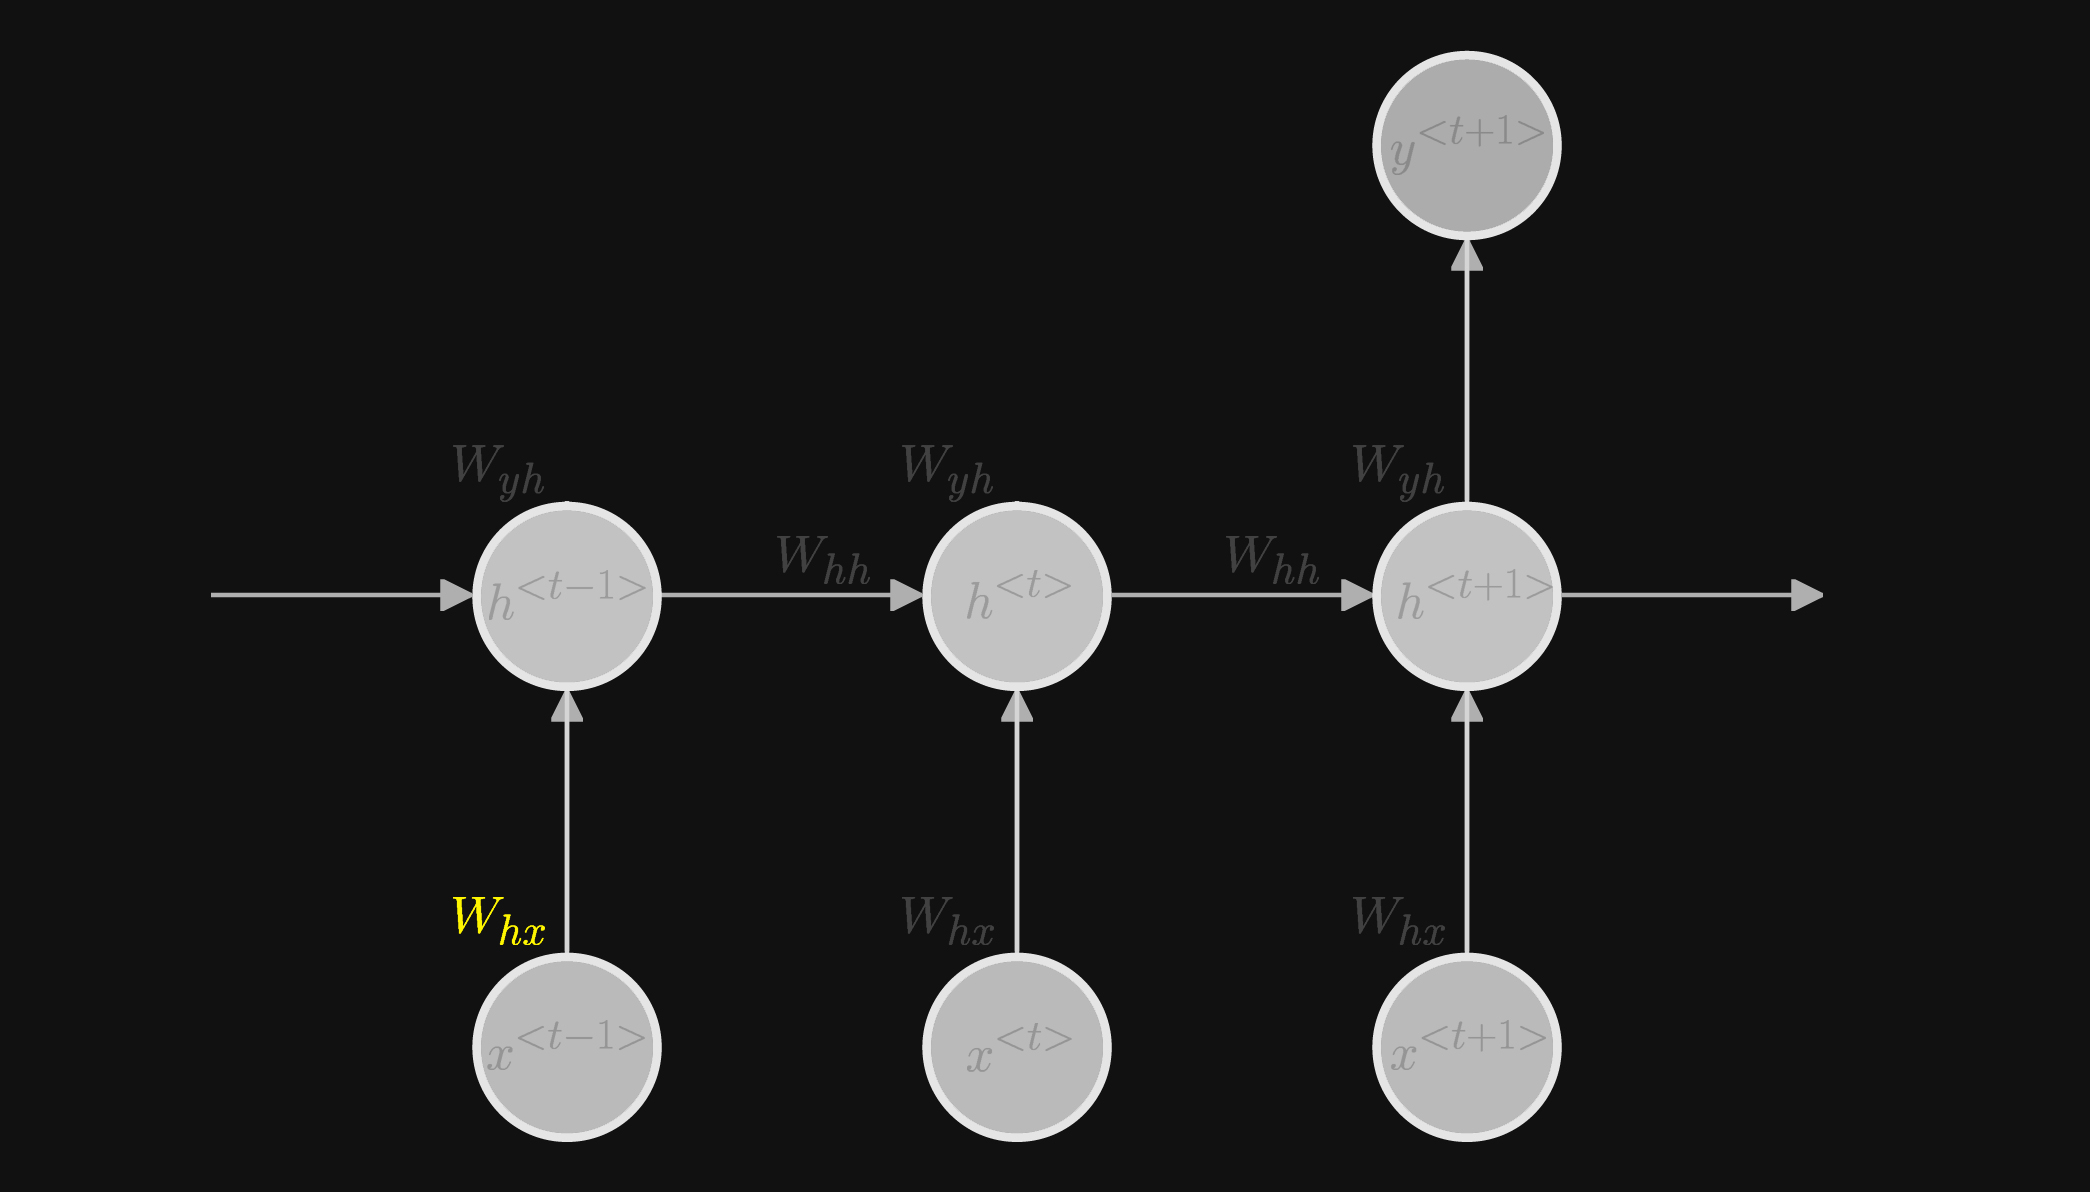

Paslėpto sluoksnuo išvestis (<code>**embedded vector or embedding**</code>). Yra tokie dedikuoti metodai skirti šiai užduočiai `Word2Vec ` tai modeliai treniruojami tik tam kad sukurti šiuos iterptinius (embedddings) vektorius. Tačiau čia ši matrica yra RNN (many to one) tinklo dalis, tai tiesiog matrica kuria tinklas išmoksta kaip struktūra tarp įvesties ir paslėto sluoksnio aktivacių, niekuo nesiskiria nuo tipinių daugiasluoksnių perceptronų. Tai kelias nuo onehot vektoriaus su įterpimo matrica į paslėpto sluoksnio išvestį yra tiesiog matricų sandauga.

\begin{multline*}
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0
\end{bmatrix}
\times
\begin{bmatrix}
    0.1 & 4.2 & 2.1 & 1.9 \\
    1.1 & 1.2 & 1.3 & 1.4 \\
    2.1 & 2.2 & 2.3 & 2.4 \\
    3.1 & 2.6 & 1.5 & 9.1 \\
    4.1 & 2.6 & 2.2 & 8.8 \\
    5.1 & 3.6 & 1.5 & 9.1 \\
    6.1 & 9.1 & 7.4 & 9.0 \\
    7.1 & 2.5 & 1.5 & 1.5 \\
    8.1 & 6.5 & 1.5 & 6.2 \\
    9.1 & 5.5 & 1.1 & 9.1 \\
    1.1 & 5.3 & 4.8 & 9.1 
\end{bmatrix}
 =
\begin{bmatrix}
7.1 & 2.5 & 1.5 & 1.5
\end{bmatrix} 
\end{multline*}

In [143]:
EM = np.array([
    [0.1, 4.2, 2.1, 1.9],
    [1.1, 1.2, 1.3, 1.4],
    [2.1, 2.2, 2.3, 2.4],
    [3.1, 2.6, 1.5, 9.1],
    [4.1, 2.6, 2.2, 8.8],
    [5.1, 3.6, 1.5, 9.1],
    [6.1, 9.1, 7.4, 9.0],
    [7.1, 2.5, 1.5, 1.5],
    [8.1, 6.5, 1.5, 6.2],
    [9.1, 5.5, 1.1, 9.1],
    [1.1, 5.3, 4.8, 9.1],
])

In [144]:
x1_oh.shape

(14, 11)

In [145]:
EM.shape

(11, 4)

In [147]:
hlo = x1_oh[0].dot(EM)
hlo

array([7.1, 2.5, 1.5, 1.5])

Tai kol kas buvo tik vienas žodis tai dabar reikės tai padaryti su kitais, su `The sun is shinning`, tai yra 4x4 matrica. Bet PyTorch praktikoje proceduros bus šiek tiek kitokios nes tokios kaip paminėtos prieš tai bus nefektyvios skaičiavimu prasme. Mūsų žodynas tik 10 žodžių, paprastai tai buna 20tks. - 200tks. Todėl naudosime `torch.nn.Embedding` kuris atliks `lookup` operacija ir sutaupys skaičiavimus. Veikimo principas toks kad naudojame indeksą:

In [148]:
sentence = x1.split(' ')

In [149]:
sentence

['The', 'sun', 'is', 'shinning']

In [150]:
words = len(sentence)

In [118]:
for word in range(words):
    index = np.where(x1_oh[word] == 1)
    print(EM[index])

[[7.1 2.5 1.5 1.5]]
[[4.1 2.6 2.2 8.8]]
[[2.1 2.2 2.3 2.4]]
[[3.1 2.6 1.5 9.1]]


Tai apibendrinus įterpimo matricos dimensijos, eilutės yra sakinio ilgis, kolonos įterpimo dydis ir tai kol kas buvo vienas duomenų pavyzdys, jeigu jų būtų daugiau tuomet mes turėtume paketo dydį, todėl ši duomenų struktūra bus 3D tensorius. Mes dirbsime su šiuo duomenų rinkiniu [IMDB](https://ai.stanford.edu/~amaas/data/sentiment/).

[Pytorch RNN(LSTM)](./code/__I_lstm.ipynb)